1.Найти в таблице (из исходных данных) название своего датасета 
2.Описать кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от - 
 до 
) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3.Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной. 
4.Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается одним методом (вы его знаете). 
5.Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается одним методом (вы его знаете). 
6.Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7.Постройте гистограммы 5 любых признаков (из множества X, или как оно изначально у нас называется data.data). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке. 
8.Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)

2. Постановка задачи и тд

Постановка задачи: Построить модель, чтобы предсказать цену недвижимости (PRICE). В моем датасете присутствуют следующие переменные:
1)BROKERTITLE: заголовок брокера.
2)TYPE: тип недвижимости.
3)PRICE: цена недвижимости, которая будет целевой переменной.
4)BEDS, BATH, PROPERTYSQFT: количество спален, ванных комнат, и площадь недвижимости.
5)ADDRESS, STATE, MAIN_ADDRESS, и другие колонки содержат адресную и географическую информацию.
Целевая переменная — Price, непрерывная, так как цена может принимать любое значение в диапазоне от минимальной до максимальной стоимости.

In [5]:
import pandas as pd

file_path = 'C:/Users/Влад/Downloads/NY-House-Dataset.csv'

data = pd.read_csv(file_path)

data.head()


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


3.Теперь проведем анализ данных и построим гистограмму распределения целевой переменной, чтобы понять её свойства и количество уникальных значений.

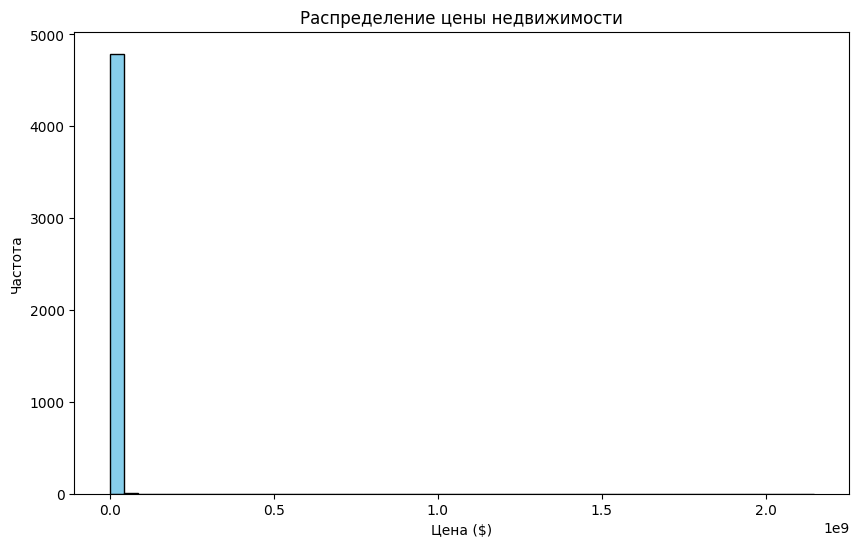

1274

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['PRICE'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение цены недвижимости')
plt.xlabel('Цена ($)')
plt.ylabel('Частота')
plt.grid(False)
plt.show()

unique_prices_count = data['PRICE'].nunique()
unique_prices_count


Гистограмма распределения цены показывает значительное смещение вправо, что свидетельствует о наличии большого количества объектов с относительно низкой стоимостью и меньшего числа объектов с очень высокой ценой.

In [8]:
unique_values_count = data['PRICE'].nunique()
print("Количество уникальных значений целевой переменной(цены недвижимости в датасете):", unique_values_count)


Количество уникальных значений целевой переменной(цены недвижимости в датасете): 1274


Это указывает на значительное разнообразие цен, что характерно для недвижимости с разными характеристиками.

4. Основные характеристики по переменным в датасете

In [12]:
stats = data.describe()
print(stats)

average_price = stats.loc['mean', 'PRICE']
median_price = stats.loc['50%', 'PRICE']
min_price = stats.loc['min', 'PRICE']
max_price = stats.loc['max', 'PRICE']

average_beds = stats.loc['mean', 'BEDS']
median_beds = stats.loc['50%', 'BEDS']
max_beds = stats.loc['max', 'BEDS']

average_bath = stats.loc['mean', 'BATH']
median_bath = stats.loc['50%', 'BATH']
max_bath = stats.loc['max', 'BATH']

average_sqft = stats.loc['mean', 'PROPERTYSQFT']
median_sqft = stats.loc['50%', 'PROPERTYSQFT']
max_sqft = stats.loc['max', 'PROPERTYSQFT']

print(f"\nPRICE (цена): средняя цена недвижимости составляет около ${average_price:,.2f}, с медианной ${median_price:,.2f}.")
print(f"Минимальная цена составляет ${min_price:,.2f}, а максимальная — ${max_price:,.2f}, что указывает на наличие выбросов с очень высокими значениями.")

print(f"\nBEDS (количество спален): медианное значение — {median_beds} спальни, максимальное — {max_beds}.")

print(f"\nBATH (количество ванных комнат): медиана равна {median_bath}, а максимальное значение — {max_bath}.")

print(f"\nPROPERTYSQFT (площадь недвижимости): среднее значение составляет около {average_sqft:,.2f} кв. футов, с медианой {median_sqft:,.2f}. Максимальная площадь — {max_sqft:,.2f} кв. футов.")


              PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4.801000e+03  4801.000000  4801.000000   4801.000000  4801.000000   
mean   2.356940e+06     3.356801     2.373861   2184.207862    40.714227   
std    3.135525e+07     2.602315     1.946962   2377.140894     0.087676   
min    2.494000e+03     1.000000     0.000000    230.000000    40.499546   
25%    4.990000e+05     2.000000     1.000000   1200.000000    40.639375   
50%    8.250000e+05     3.000000     2.000000   2184.207862    40.726749   
75%    1.495000e+06     4.000000     3.000000   2184.207862    40.771923   
max    2.147484e+09    50.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4801.000000  
mean    -73.941601  
std       0.101082  
min     -74.253033  
25%     -73.987143  
50%     -73.949189  
75%     -73.870638  
max     -73.702450  

PRICE (цена): средняя цена недвижимости составляет около $2,356,940.17, с медианной $825,000.00.
Минимальная цена составляет 

5. Основная информация по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 


In [14]:
missing_values = data.isnull().sum()
print("Количество пропусков в каждой колонке:")
print(missing_values)



Количество пропусков в каждой колонке:
BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


Возможные причины появления пропусков:
Недостаток данных: Пропуски могут возникнуть из-за неполного заполнения данных, когда для некоторых объектов не предоставлена вся информация.
Ошибки при сборе данных: Проблемы с загрузкой или передачей данных могут привести к отсутствию значений.
Несовместимость данных: Данные могут отсутствовать в колонках, которые были добавлены позже или получены из разных источников.
Варианты замены пропусков:
Среднее значение: для числовых данных.
Медиана: полезно для данных с выбросами.
Мода (наиболее часто встречающееся значение): для категориальных данных.
Удаление строк: если пропусков мало и их удаление не повлияет на качество анализа.
Специальные значения: например, "N/A" или "0", если это логически обосновано.

In [ ]:
# Пример замены пропусков средним значением в числовых колонках
#data['COLUMN_NAME'].fillna(data['COLUMN_NAME'].mean(), inplace=True)


7.Постройте гистограммы 5 любых признаков (из множества X, или как оно изначально у нас называется data.data). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке. 

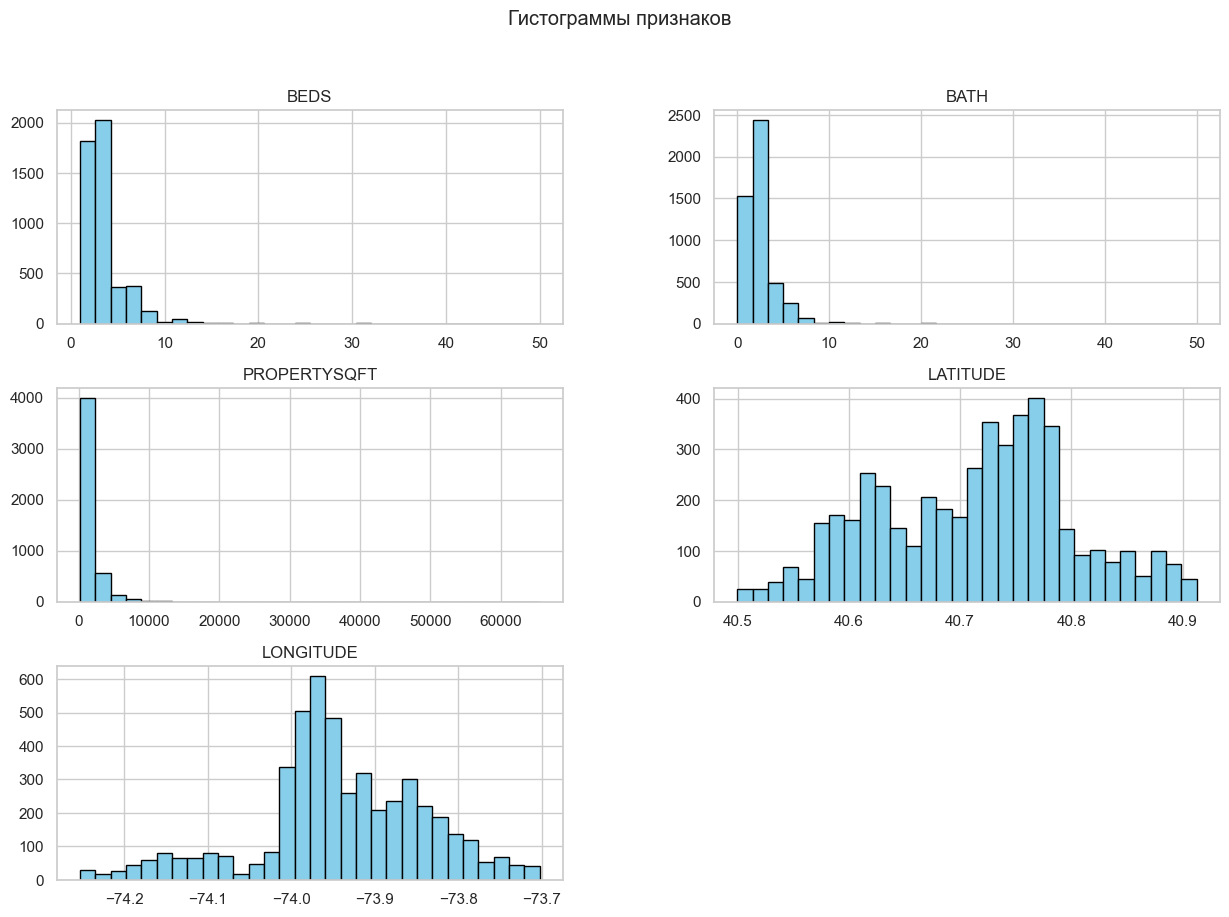

In [11]:
features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']

data[features].hist(figsize=(15, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Гистограммы признаков')
plt.show()


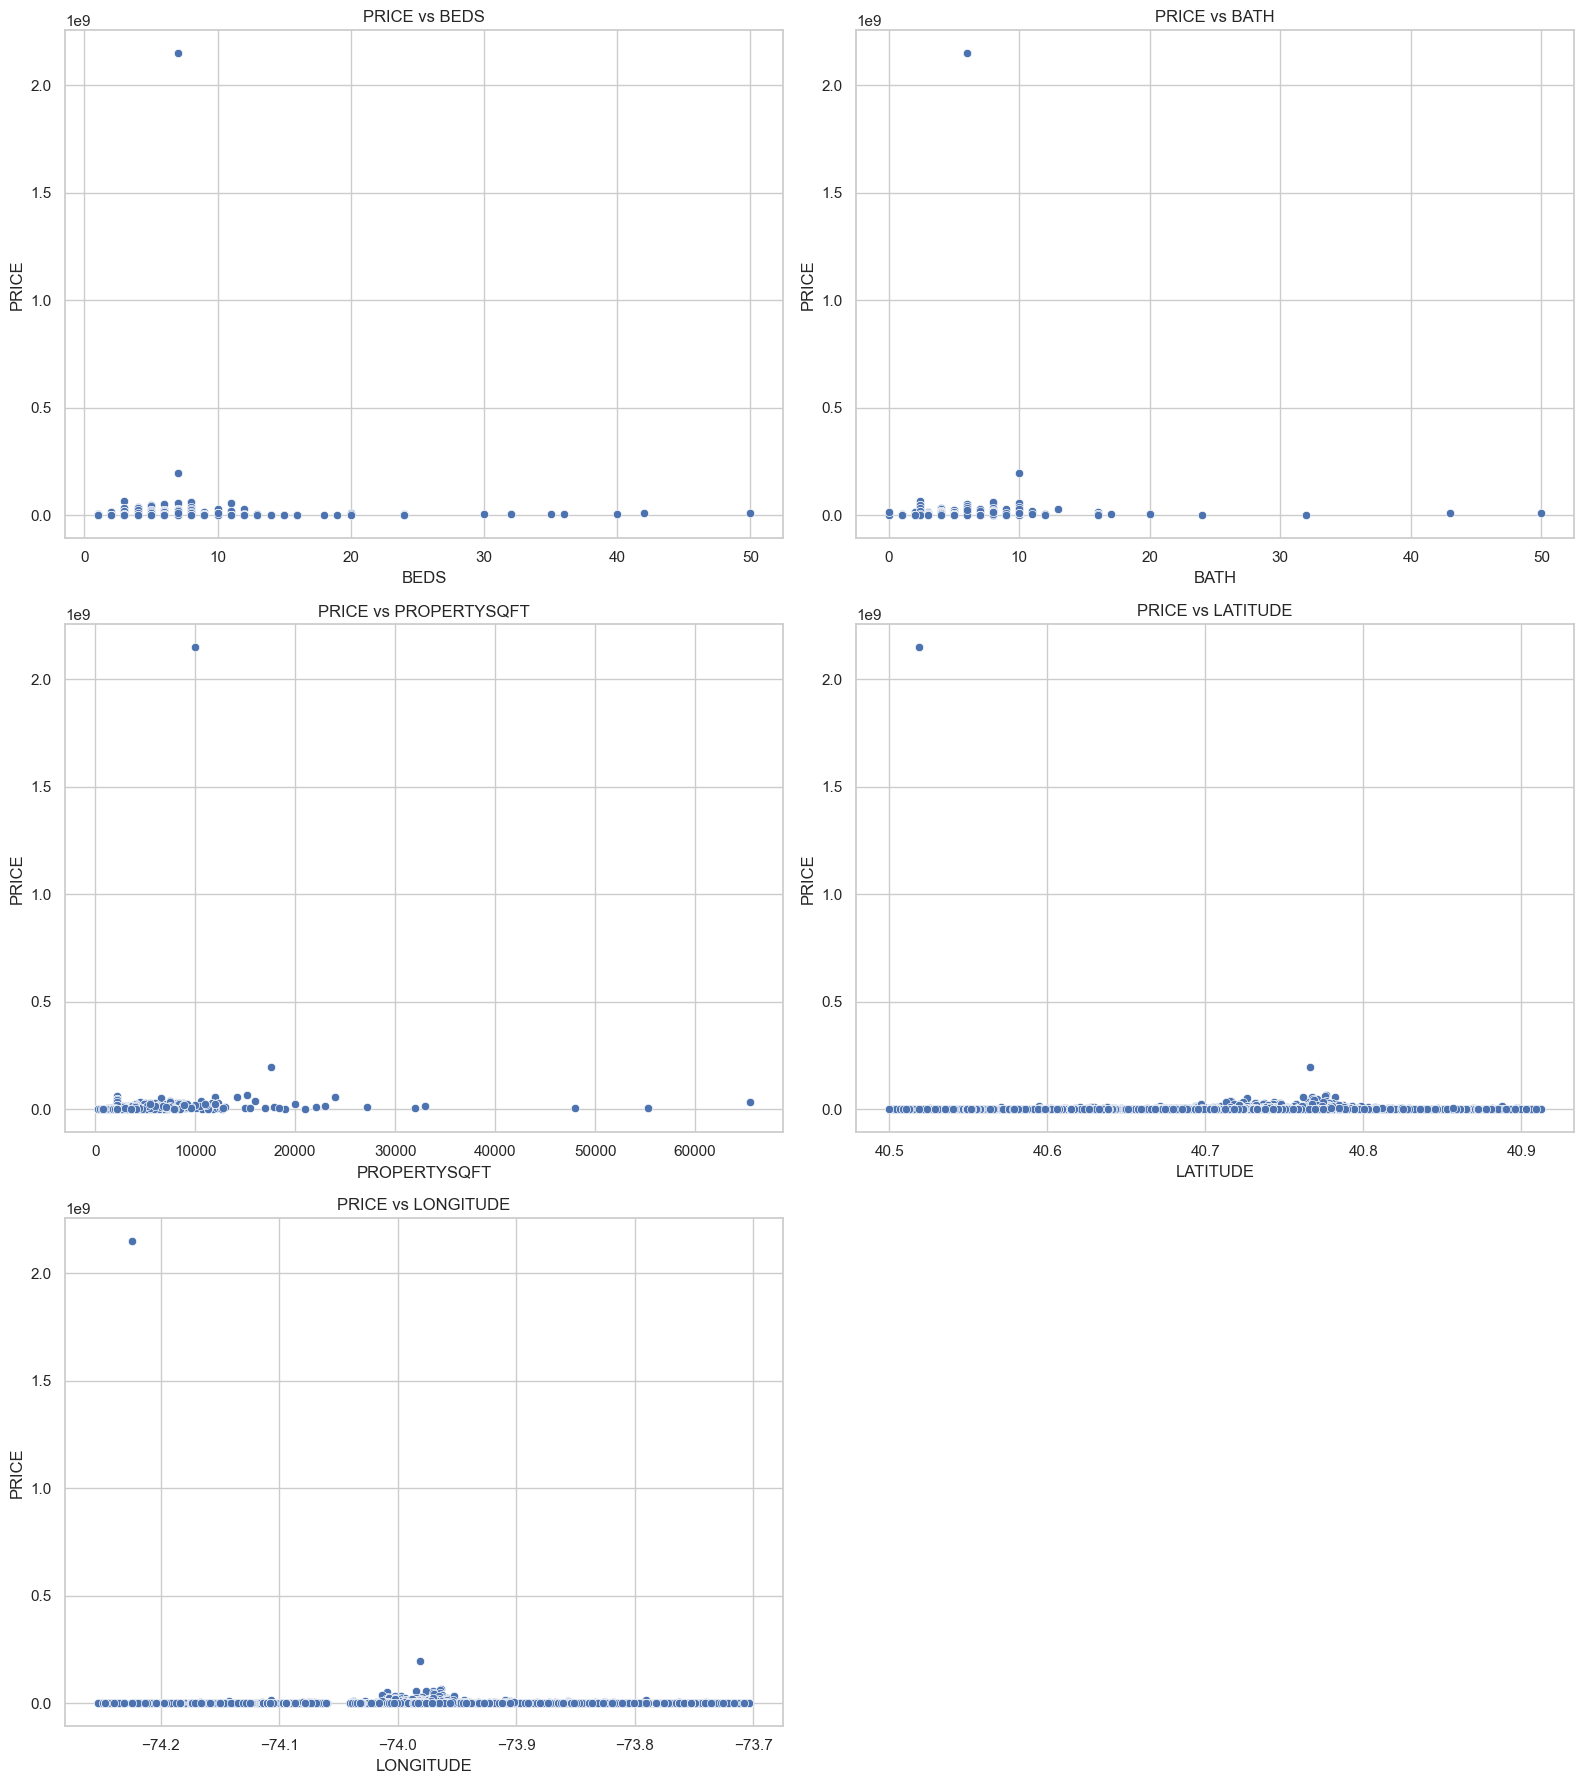

In [10]:
import seaborn as sns

sns.set(style="whitegrid")

features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y='PRICE', data=data, ax=axes[i])
    axes[i].set_title(f'PRICE vs {feature}')

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Из анализа графиков видно следующее:

PRICE vs BEDS: Наблюдается некоторая положительная взаимосвязь — большее количество спален зачастую соответствует более высокой цене.
PRICE vs BATH: Зависимость аналогична количеству спален: большее число ванных комнат связано с увеличением цены.
PRICE vs PROPERTYSQFT: Присутствует явная положительная корреляция: с увеличением площади недвижимости цена возрастает.
PRICE vs LATITUDE и PRICE vs LONGITUDE: Географические координаты показывают неявные связи с ценой, что может указывать на расположение в более престижных или дорогих районах.
Эти переменные могут быть полезны для прогнозирования целевой переменной PRICE, особенно переменные, связанные с размерами и характеристиками недвижимости (BEDS, BATH, PROPERTYSQFT)